In [76]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [77]:
salary_data = pd.read_csv('Resources/City_PayRoll_LA.csv')
salary_data.head()


C:\Users\sreek\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,24,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,Q2 Payments,Q3 Payments,Q4 Payments,Payments Over Base Pay,% Over Base Pay,Total Payments,Base Pay,Permanent Bonus Pay,Longevity Bonus Pay,Temporary Bonus Pay,Lump Sum Pay,Overtime Pay,Other Pay & Adjustments,Other Pay (Payroll Explorer),MOU,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,111391,2014,Water And Power (DWP),NaN,1412316577,Commercial Service Representative,Full Time,NaN,$70386.48,$16129.89,$17829.78,$17678.24,$22946.57,$14273.91,23.67%,$74584.48,$60310.57,$0.00,$0.00,$0.00,NaN,$369.12,$13904.79,$13904.79,NaN,NaN,98,1230,NaN,$16842.08,$1282.61,$0.00,$18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,$25.12,$52450.56,$11331.00,$13859.93,$11968.32,$14048.20,$1700.40,3.43%,$51207.45,$49507.05,$1269.83,$0.00,$239.20,$0.00,$11.13,$180.24,$1689.27,24,POLICE OFFICERS UNIT,70,2214,A,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,$42.77,$89303.76,$20036.32,$23479.20,$21153.60,$24360.49,$4120.20,4.85%,$89029.61,$84909.41,$1954.51,$0.00,$1519.00,$0.00,$482.29,$164.40,$3637.91,24,POLICE OFFICERS UNIT,70,2214,2,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,$28.75,$60028.96,$15793.88,$18560.38,$16471.18,$21110.80,$14275.44,24.76%,$71936.24,$57660.80,$0.00,$1585.72,$935.00,$0.00,$11504.72,$250.00,$2770.72,12,SUPV BLUE COLLAR,42,3184,0,$10710.24,$405.24,$11.40,$11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,$30.92,$64553.13,$14700.00,$17313.10,$15257.17,$17313.10,$5191.62,8.74%,$64583.37,$59391.75,$0.00,$4774.25,$0.00,$0.00,$417.37,$0.00,$4774.25,3,CLERICAL UNIT,82,1368,0,$11000.40,$409.68,$11.40,$11421.48,City,http://per.lacity.org/perspecs/1368.pdf


In [78]:
salary_data.dropna(subset=['Total Payments'], inplace=True)
columns_replace = [ 'Hourly or Event Rate', 'Projected Annual Salary', 'Q1 Payments',
       'Q2 Payments', 'Q3 Payments', 'Q4 Payments', 'Payments Over Base Pay',
        'Total Payments', 'Base Pay', 'Permanent Bonus Pay',
       'Longevity Bonus Pay', 'Temporary Bonus Pay', 'Lump Sum Pay',
       'Overtime Pay', 'Other Pay & Adjustments',
       'Other Pay (Payroll Explorer)', 'Average Health Cost', 'Average Dental Cost',
       'Average Basic Life', 'Average Benefit Cost']


for col in columns_replace:
    salary_data[col]=salary_data[col].str.replace('$','').astype(float)

In [79]:



# salary_data.columns
salary_data.head()
len(salary_data)

285008

In [80]:
salary_data['% Over Base Pay']=salary_data['% Over Base Pay'].str.replace('%','')
salary_data

,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,Q2 Payments,Q3 Payments,Q4 Payments,Payments Over Base Pay,% Over Base Pay,Total Payments,Base Pay,Permanent Bonus Pay,Longevity Bonus Pay,Temporary Bonus Pay,Lump Sum Pay,Overtime Pay,Other Pay & Adjustments,Other Pay (Payroll Explorer),MOU,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,111391,2014,Water And Power (DWP),NaN,1412316577,Commercial Service Representative,Full Time,NaN,70386.48,16129.89,17829.78,17678.24,22946.57,14273.91,23.67,74584.48,60310.57,0.00,0.00,0.0,NaN,369.12,13904.79,13904.79,NaN,NaN,98,1230,NaN,16842.08,1282.61,0.00,18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,25.12,52450.56,11331.00,13859.93,11968.32,14048.20,1700.40,3.43,51207.45,49507.05,1269.83,0.00,239.2,0.0,11.13,180.24,1689.27,24,POLICE OFFICERS UNIT,70,2214,A,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,42.77,89303.76,20036.32,23479.20,21153.60,24360.49,4120.20,4.85,89029.61,84909.41,1954.51,0.00,1519.0,0.0,482.29,164.40,3637.91,24,POLICE OFFICERS UNIT,70,2214,2,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,28.75,60028.96,15793.88,18560.38,16471.18,21110.80,14275.44,24.76,71936.24,57660.80,0.00,1585.72,935.0,0.0,11504.72,250.00,2770.72,12,SUPV BLUE COLLAR,42,3184,0,10710.24,405.24,11.40,11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,30.92,64553.13,14700.00,17313.10,15257.17,17313.10,5191.62,8.74,64583.37,59391.75,0.00,4774.25,0.0,0.0,417.37,0.00,4774.25,3,CLERICAL UNIT,82,1368,0,11000.40,409.68,11.40,11421.48,City,http://per.lacity.org/perspecs/1368.pdf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285003,285204,2016,Water And Power (DWP),NaN,112788496,Waterworks Mechanic Supervisor,Full Time,57.32,119684.16,55484.82,40483.89,0.00,0.00,37801.25,64.99,95968.71,58167.46,0.00,2223.34,0.0,0.0,30861.05,4716.86,6940.20,B,Supervisory Blue Collar Unit,98,3987,NaN,18144.43,1248.19,0.00,19392.62,DWP,http://per.lacity.org/perspecs/3987.pdf
285004,285205,2016,Water And Power (DWP),NaN,2560101653,Waterworks Mechanic Supervisor,Full Time,58.76,122690.88,45921.05,32986.77,0.00,0.00,20740.49,35.66,78907.82,58167.33,0.00,3548.21,0.0,0.0,11941.36,5250.92,8799.13,B,Supervisory Blue Collar Unit,98,3987,NaN,18144.43,1248.19,0.00,19392.62,DWP,http://per.lacity.org/perspecs/3987.pdf
285005,285206,2016,Water And Power (DWP),NaN,3792124730,Waterworks Mechanic Supervisor,Full Time,58.76,122690.88,54746.99,36433.31,0.00,0.00,32971.11,56.64,91180.30,58209.19,0.00,4157.49,0.0,0.0,23962.96,4850.66,9008.15,B,Supervisory Blue Collar Unit,98,3987,NaN,18144.43,1248.19,0.00,19392.62,DWP,http://per.lacity.org/perspecs/3987.pdf
285006,285207,2016,Water And Power (DWP),NaN,2425641362,Waterworks Mechanic Supervisor,Full Time,58.76,122690.88,52753.23,38925.91,0.00,0.00,33060.46,56.40,91679.14,58618.68,0.00,4160.13,0.0,0.0,23596.38,5303.95,9464.08,B,Supervisory Blue Collar Unit,98,3987,NaN,18144.43,1248.19,0.00,19392.62,DWP,http://per.lacity.org/perspecs/3987.pdf


In [81]:
group_salary = salary_data.groupby('Department Title').nunique()
select_data = group_salary[group_salary['Total Payments']>10000]
select_index = select_data.index
group_salary.sort_values('Total Payments', ascending = False)
select_data
select_index

Index(['Airports (LAWA)', 'Fire (LAFD)', 'Police (LAPD)',
       'Public Works - Sanitation', 'Recreation And Parks',
       'Water And Power (DWP)'],
      dtype='object', name='Department Title')

In [82]:
dataset = salary_data.loc[salary_data['Department Title'].isin(select_index)].copy(deep=True)
dataset = dataset.sort_values('Total Payments', ascending = False)
dataset

,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,Q2 Payments,Q3 Payments,Q4 Payments,Payments Over Base Pay,% Over Base Pay,Total Payments,Base Pay,Permanent Bonus Pay,Longevity Bonus Pay,Temporary Bonus Pay,Lump Sum Pay,Overtime Pay,Other Pay & Adjustments,Other Pay (Payroll Explorer),MOU,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
56573,19333,2013,Police (LAPD),4301.0,4235280295,Police Officer III,Full Time,50.12,104642.21,0.00,0.00,0.00,500930.74,435621.77,667.02,500930.74,65308.97,5581.75,0.0,1911.04,0.00,0.00,428128.98,435621.77,24,POLICE OFFICERS UNIT,70,2214,3,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
168006,123010,2015,Fire (LAFD),3001.0,1081092723,Fire Captain I,Full Time,63.51,132603.66,95633.26,107862.25,122415.22,122683.60,327765.53,271.26,448594.33,120828.80,9967.60,0.0,1088.00,2137.63,311315.62,3256.68,16449.91,23,FIREFIGHTERS & FIRE CAPTAINS,38,2142,1,13031.40,896.76,178.68,14106.84,Fire,http://per.lacity.org/perspecs/2142.pdf
142297,162626,2015,Water And Power (DWP),NaN,2720285819,Electrical Service Manager,Full Time,123.12,257074.56,78928.80,58554.62,156964.90,130418.51,294852.11,226.78,424866.83,130014.72,0.00,0.0,0.00,NaN,0.00,294852.11,294852.11,M,MANAGEMENT EMPLOYEES UNIT,98,5265,NaN,17486.94,1268.69,0.00,18755.63,DWP,http://per.lacity.org/perspecs/5265.pdf
155335,123011,2015,Fire (LAFD),3001.0,2236794545,Fire Captain I,Full Time,63.39,132347.88,87225.34,92065.04,127257.45,98818.97,284538.00,235.49,405366.80,120828.80,9690.40,0.0,1088.00,0.00,273495.60,264.00,11042.40,23,FIREFIGHTERS & FIRE CAPTAINS,38,2142,1,13031.40,896.76,178.68,14106.84,Fire,http://per.lacity.org/perspecs/2142.pdf
119602,123012,2015,Fire (LAFD),3001.0,2837442648,Firefighter III,Full Time,39.64,82766.83,74708.81,105354.78,117150.25,107094.21,317149.65,363.88,404308.05,87158.40,19752.40,7410.0,1088.00,0.00,286732.56,2166.69,30417.09,23,FIREFIGHTERS & FIRE CAPTAINS,38,2112,3,13031.40,896.76,178.68,14106.84,Fire,http://per.lacity.org/perspecs/2112.pdf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17240,93011,2014,Public Works - Sanitation,7028.0,4267182253,Refuse Collection Truck Operator II,Full Time,32.93,68760.71,0.00,-503.52,0.00,0.00,-503.52,0.00,-503.52,0.00,0.00,0.0,0.00,0.00,0.00,-503.52,-503.52,04,EQUIP.OPER. & LABOR,82,3580,2,11000.40,409.68,11.40,11421.48,City,http://per.lacity.org/perspecs/3580.pdf
34343,101266,2014,Recreation And Parks,7903.0,2911487762,Recreation Assistant,Part Time,14.79,30881.52,-591.60,0.00,0.00,0.00,-591.60,0.00,-591.60,0.00,0.00,0.0,0.00,0.00,0.00,-591.60,-591.60,07,RECREATIONAL ASST. UNIT,88,2498,B,0.00,0.00,0.00,0.00,NaN,http://per.lacity.org/perspecs/2498.pdf
102618,32762,2013,Police (LAPD),4302.0,3667434318,Security Officer,Full Time,25.69,53635.50,-2254.58,0.00,0.00,0.00,-2254.58,0.00,-2254.58,0.00,0.00,0.0,150.00,1549.81,0.00,-3954.39,-2254.58,18,SAFETY/SECURITY UNIT,70,3181,0,10710.24,405.24,11.40,11126.88,City,http://per.lacity.org/perspecs/3181.pdf
30520,32763,2013,Police (LAPD),4301.0,3791724580,Police Officer II,Full Time,45.27,94523.76,-244.44,-2053.61,0.00,0.00,-2298.05,0.00,-2298.05,0.00,0.00,0.0,0.00,0.00,0.00,-2298.05,-2298.05,24,POLICE OFFICERS UNIT,70,2214,2,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2214.pdf


In [83]:
dataset['Department Title'].unique()

array(['Police (LAPD)', 'Fire (LAFD)', 'Water And Power (DWP)',
       'Airports (LAWA)', 'Public Works - Sanitation',
       'Recreation And Parks'], dtype=object)

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Department Title', ylabel='Total Payments'>

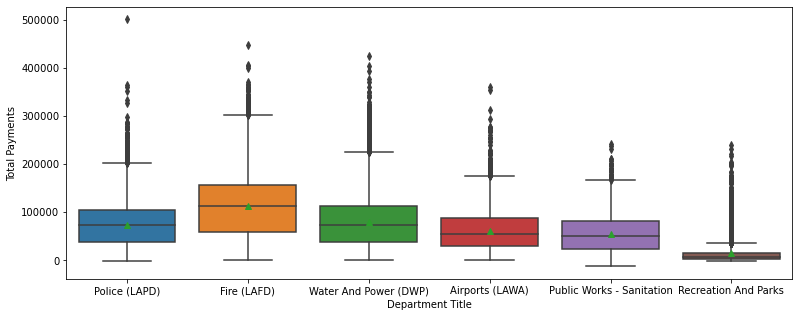

In [85]:
fig, ax = plt.subplots(figsize = (13,5))
# sns.stripplot(x='Department Title',y='Total Payments', data = dataset, alpha = 0.2, ax = ax,hue ='Year')
sns.boxplot(x='Department Title',y='Total Payments', data = dataset, ax = ax, showmeans=True)

<AxesSubplot:xlabel='Department Title', ylabel='Total Payments'>

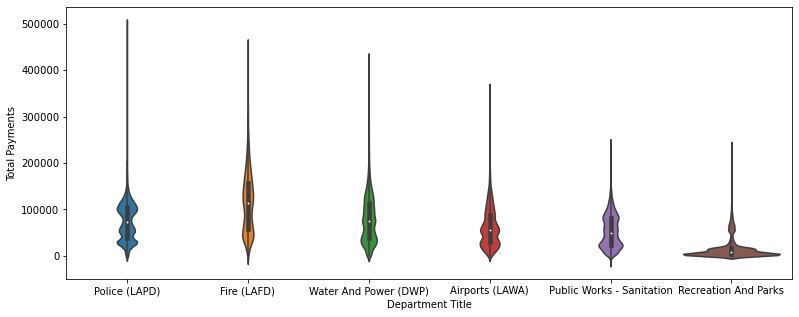

In [86]:
fig, ax = plt.subplots(figsize = (13,5))

sns.violinplot(x='Department Title',y='Total Payments', data = dataset, ax = ax, showmeans=True)

<AxesSubplot:xlabel='Total Payments', ylabel='Count'>

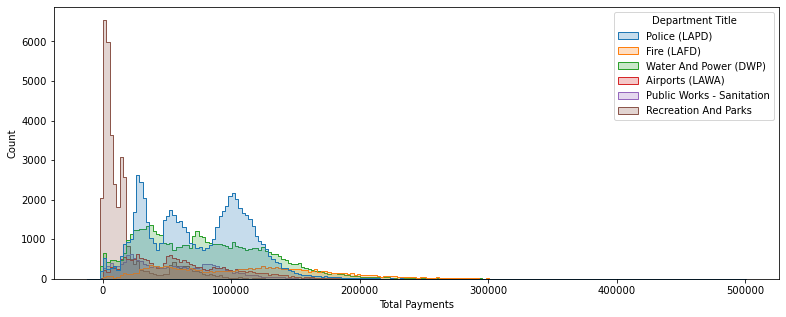

In [87]:
fig, ax = plt.subplots(figsize = (13,5))
# sns.histplot(x='Department Title',y='Total Payments', data = dataset, ax = ax, showmeans=True)
sns.histplot(data=dataset, x='Total Payments', hue='Department Title', element='step')

In [88]:
#filtering for outliers - total payments more than zero and less than 400,000
filtered_dataset = dataset.loc[(dataset['Total Payments']>0) & (dataset['Total Payments']<=300000)]
filtered_dataset

,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,Q2 Payments,Q3 Payments,Q4 Payments,Payments Over Base Pay,% Over Base Pay,Total Payments,Base Pay,Permanent Bonus Pay,Longevity Bonus Pay,Temporary Bonus Pay,Lump Sum Pay,Overtime Pay,Other Pay & Adjustments,Other Pay (Payroll Explorer),MOU,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
151934,162645,2015,Water And Power (DWP),NaN,2130375699,Electrical Distribution Mechanic Supervisor,Full Time,68.88,143821.44,78380.67,71979.53,82371.88,66825.25,163695.68,120.49,299557.33,135861.65,0.00,13547.00,0.0,NaN,131823.84,18324.84,31871.84,B,SUPERVISORY BLUE COLLAR UNIT,98,3873,NaN,17486.94,1268.69,0.00,18755.63,DWP,http://per.lacity.org/perspecs/3873.pdf
157692,123059,2015,Fire (LAFD),3001.0,1079101020,Engineer of Fire Department,Full Time,38.17,79690.76,69744.50,90006.71,74420.10,65353.98,196893.29,191.84,299525.29,102632.00,7410.00,0.00,1088.0,0.00,187999.29,396.00,8894.00,23,FIREFIGHTERS & FIRE CAPTAINS,38,2131,0,13031.40,896.76,178.68,14106.84,Fire,http://per.lacity.org/perspecs/2131.pdf
80350,103259,2014,Water And Power (DWP),NaN,3818541918,Transmission & Distribution District Supervisor,Full Time,NaN,186541.92,60871.12,62386.68,66076.45,110021.53,123947.78,70.66,299355.78,175408.00,0.00,0.00,0.0,NaN,74748.64,49199.14,49199.14,NaN,NaN,98,3875,NaN,16842.08,1282.61,0.00,18124.69,DWP,http://per.lacity.org/perspecs/3875.pdf
83486,65132,2014,Fire (LAFD),3001.0,3000652402,Fire Chief,Full Time,140.05,292424.40,69516.92,79008.42,66665.77,84030.00,77501.94,34.96,299221.11,221719.17,5576.63,0.00,748.0,688.26,71177.31,-688.26,6324.63,00,NON-REPRESENTED,38,9339,0,12998.64,890.40,165.24,14054.28,Fire,http://per.lacity.org/perspecs/9339.pdf
13828,65133,2014,Fire (LAFD),3001.0,3828116389,Firefighter III,Full Time,38.01,79355.19,45714.77,51080.40,54483.22,147914.96,213146.84,247.71,299193.35,86046.51,16901.74,7035.83,884.0,0.00,101380.45,86944.82,111766.39,23,FIREFIGHTERS & FIRE CAPT,38,2112,3,12998.64,890.40,165.24,14054.28,Fire,http://per.lacity.org/perspecs/2112.pdf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19027,160650,2015,Recreation And Parks,7903.0,1946441534,Assistant Park Services Attendant II,Part Time,18.75,39150.00,0.00,0.00,0.38,0.00,0.38,0.00,0.38,0.00,0.00,0.00,0.0,0.00,0.38,0.00,0.38,03,CLERICAL,88,2418,2,0.00,0.00,0.00,0.00,NaN,http://per.lacity.org/perspecs/2418.pdf
267798,267937,2016,Recreation And Parks,7903.0,2777667565,Recreation Assistant,Part Time,15.61,32593.68,0.00,0.29,0.00,0.00,0.29,0.00,0.29,0.00,0.00,0.00,0.0,0.00,0.00,0.29,0.29,07,Recreation Assistants,88,2498,C,0.00,0.00,0.00,0.00,City,http://per.lacity.org/perspecs/2498.pdf
268594,268734,2016,Recreation And Parks,7903.0,511191671,Recreation Assistant,Part Time,15.00,31320.00,0.00,0.21,0.00,0.00,0.21,0.00,0.21,0.00,0.00,0.00,0.0,0.00,0.00,0.21,0.21,07,Recreation Assistants,88,2498,A,0.00,0.00,0.00,0.00,City,http://per.lacity.org/perspecs/2498.pdf
268825,268972,2016,Recreation And Parks,7903.0,1869873817,Recreation Assistant,Part Time,16.50,34452.00,0.00,0.18,0.00,0.00,0.18,0.00,0.18,0.00,0.00,0.00,0.0,0.00,0.00,0.18,0.18,07,Recreation Assistants,88,2498,B,0.00,0.00,0.00,0.00,City,http://per.lacity.org/perspecs/2498.pdf


<AxesSubplot:xlabel='Total Payments', ylabel='Count'>

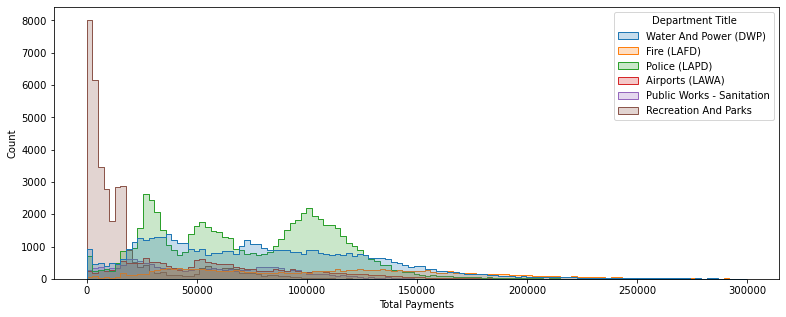

In [89]:
fig, ax = plt.subplots(figsize = (13,5))
# sns.histplot(x='Department Title',y='Total Payments', data = dataset, ax = ax, showmeans=True)
sns.histplot(data=filtered_dataset, x='Total Payments', hue='Department Title', element='step')

In [90]:
#writing the file to csv
filtered_dataset.to_csv('Output/filtered_dataset.csv', index=False)

<AxesSubplot:xlabel='Year', ylabel='Total Payments'>

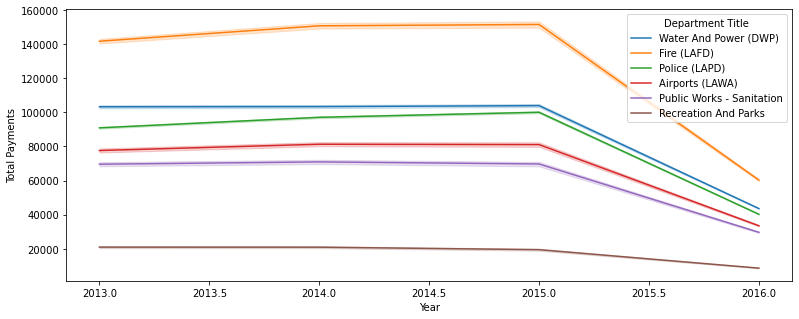

In [91]:
# sns.stripplot(x='Year',y='Total Payments', data = dataset, alpha = 0.2,hue ='Department Title')
fig, ax1 = plt.subplots(figsize = (13,5))
order =['Water And Power (DWP)', 'Police (LAPD)',
       'Public Works - Sanitation', 'Airports (LAWA)','Recreation And Parks', 'Fire (LAFD)']
sns.lineplot(x='Year',y='Total Payments', data = filtered_dataset,hue ='Department Title', ax=ax1)

<AxesSubplot:xlabel='Year', ylabel='Total Payments'>

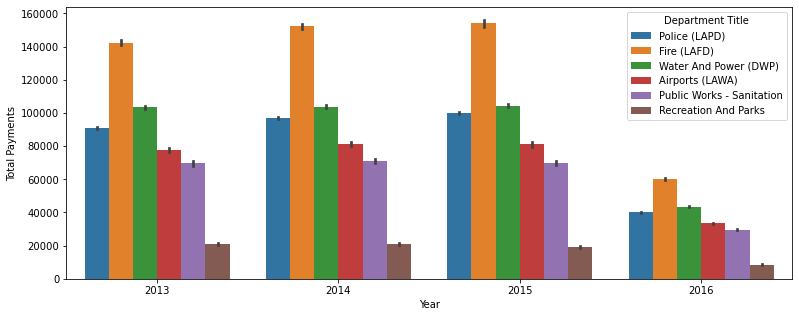

In [92]:
# sns.stripplot(x='Year',y='Total Payments', data = dataset, alpha = 0.2,hue ='Department Title')
fig, ax1 = plt.subplots(figsize = (13,5))
order =['Water And Power (DWP)', 'Police (LAPD)',
       'Public Works - Sanitation', 'Airports (LAWA)','Recreation And Parks', 'Fire (LAFD)']
sns.barplot(x='Year',y='Total Payments', data = dataset,hue ='Department Title', ax=ax1)


In [93]:
dataset_Fire = dataset[dataset['Department Title']=='Fire (LAFD)']
dataset_Fire

,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,Q2 Payments,Q3 Payments,Q4 Payments,Payments Over Base Pay,% Over Base Pay,Total Payments,Base Pay,Permanent Bonus Pay,Longevity Bonus Pay,Temporary Bonus Pay,Lump Sum Pay,Overtime Pay,Other Pay & Adjustments,Other Pay (Payroll Explorer),MOU,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
168006,123010,2015,Fire (LAFD),3001.0,1081092723,Fire Captain I,Full Time,63.51,132603.66,95633.26,107862.25,122415.22,122683.60,327765.53,271.26,448594.33,120828.80,9967.60,0.00,1088.0,2137.63,311315.62,3256.68,16449.91,23,FIREFIGHTERS & FIRE CAPTAINS,38,2142,1,13031.40,896.76,178.68,14106.84,Fire,http://per.lacity.org/perspecs/2142.pdf
155335,123011,2015,Fire (LAFD),3001.0,2236794545,Fire Captain I,Full Time,63.39,132347.88,87225.34,92065.04,127257.45,98818.97,284538.00,235.49,405366.80,120828.80,9690.40,0.00,1088.0,0.00,273495.60,264.00,11042.40,23,FIREFIGHTERS & FIRE CAPTAINS,38,2142,1,13031.40,896.76,178.68,14106.84,Fire,http://per.lacity.org/perspecs/2142.pdf
119602,123012,2015,Fire (LAFD),3001.0,2837442648,Firefighter III,Full Time,39.64,82766.83,74708.81,105354.78,117150.25,107094.21,317149.65,363.88,404308.05,87158.40,19752.40,7410.00,1088.0,0.00,286732.56,2166.69,30417.09,23,FIREFIGHTERS & FIRE CAPTAINS,38,2112,3,13031.40,896.76,178.68,14106.84,Fire,http://per.lacity.org/perspecs/2112.pdf
102351,65105,2014,Fire (LAFD),3001.0,2837442648,Firefighter III,Full Time,38.93,81290.31,91295.66,114459.94,96811.55,97715.42,314251.78,365.28,400282.57,86030.79,19533.26,7034.55,884.0,0.00,286535.97,264.00,27715.81,23,FIREFIGHTERS & FIRE CAPT,38,2112,3,12998.64,890.40,165.24,14054.28,Fire,http://per.lacity.org/perspecs/2112.pdf
134435,123013,2015,Fire (LAFD),3001.0,2734423944,Fire Captain II,Full Time,66.69,139238.28,73978.69,75697.64,119571.24,102160.69,243990.66,191.49,371408.26,127417.60,9887.20,0.00,1088.0,2804.36,230139.60,71.50,13851.06,23,FIREFIGHTERS & FIRE CAPTAINS,38,2142,2,13031.40,896.76,178.68,14106.84,Fire,http://per.lacity.org/perspecs/2142.pdf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176419,240595,2016,Fire (LAFD),3002.0,2584369434,Student Professional Worker,Part Time,15.41,32176.08,0.00,308.20,0.00,0.00,0.00,0.00,308.20,308.20,0.00,0.00,0.0,0.00,0.00,0.00,0.00,00,Non-Represented Employees,38,1502,0,0.00,0.00,0.00,0.00,City,http://per.lacity.org/perspecs/1502.pdf
174150,238332,2016,Fire (LAFD),3001.0,3104501990,Firefighter I,Full Time,29.00,60552.00,210.50,0.00,0.00,0.00,51.00,31.97,210.50,159.50,0.00,0.00,51.0,0.00,0.00,0.00,51.00,23,Firefighters & Fire Captains,38,2112,1,12630.04,929.22,192.74,13752.00,Fire,http://per.lacity.org/perspecs/2112.pdf
192180,183639,2016,Fire (LAFD),3001.0,3104501990,Firefighter I,Full Time,29.00,60552.00,210.50,0.00,0.00,0.00,51.00,0.32,210.50,159.50,0.00,0.00,51.0,0.00,0.00,0.00,51.00,23,Firefighters & Fire Captains,38,2112,NaN,13031.40,896.76,178.68,14106.84,Fire,http://per.lacity.org/perspecs/2112.pdf
176422,240598,2016,Fire (LAFD),3002.0,3146751569,Student Professional Worker,Part Time,15.41,32176.08,0.00,192.63,0.00,0.00,0.00,0.00,192.63,192.63,0.00,0.00,0.0,0.00,0.00,0.00,0.00,00,Non-Represented Employees,38,1502,0,0.00,0.00,0.00,0.00,City,http://per.lacity.org/perspecs/1502.pdf


In [94]:
Fire_yearly_group = dataset_Fire.groupby('Year').mean()
Fire_yearly_group

,Row ID,Payroll Department,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,Q2 Payments,Q3 Payments,Q4 Payments,Payments Over Base Pay,Total Payments,Base Pay,Permanent Bonus Pay,Longevity Bonus Pay,Temporary Bonus Pay,Lump Sum Pay,Overtime Pay,Other Pay & Adjustments,Other Pay (Payroll Explorer),FMS Department,Job Class,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost
Year,,,,,,,,,,,,,,,,,,,,,,,,
2013,10172.500000,3001.088579,38.709552,80825.391265,32837.423220,37737.406802,32696.724203,39092.389426,52862.668747,142363.943652,89501.274905,8807.500159,1258.531850,911.773175,786.719582,39534.748501,1563.395479,13327.920245,38.0,2211.814206,12813.221348,847.067699,146.790084,13807.079131
2014,66884.000000,3001.087665,39.463602,82398.091059,34599.014288,41943.466727,34344.373479,41307.382557,60337.577606,152194.237050,91856.659444,8945.357910,1532.589938,906.394358,698.762484,45772.906406,2481.566510,14564.671200,38.0,2214.124473,12812.501489,848.762664,152.083394,13813.347547
2015,124849.000000,3001.089970,39.899372,83309.314599,34472.959247,41052.571519,43163.376420,35335.064297,64530.037130,154023.971484,89493.934354,8570.211824,1292.759136,1089.623824,1138.726396,50618.157633,1820.558317,13911.879497,38.0,2240.067410,12839.174123,853.584952,163.978059,13856.737135
2016,211736.433206,3001.088147,39.554286,82588.848262,42088.682012,18194.873568,0.000000,0.000000,24861.885074,60283.555580,35421.670506,3297.367815,484.054480,518.517906,623.528165,19128.623069,809.793639,5733.262005,38.0,2239.084725,12671.066296,868.770665,170.577561,13710.414522


<AxesSubplot:xlabel='Year', ylabel='Total Payments'>

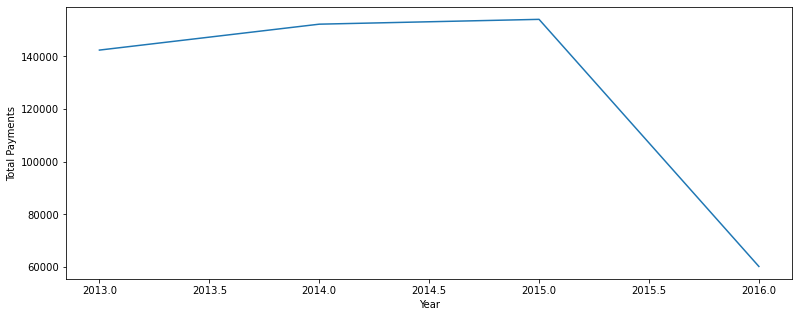

In [95]:
fig, ax2 = plt.subplots(figsize = (13,5))

sns.lineplot(x='Year',y='Total Payments', data = Fire_yearly_group, ax=ax2, markers=True, markersize=5)